In [ ]:
"""
To do motion correction using ants if multiple scans of same subject(person)
"""

Running NPP Model

In [2]:
import subprocess

# Define the command as a list of arguments
command = [
    "nppy",
    "--gpu",           # load model on gpu
    "-i", "input_folder", #input folder directory
    "-o", "output_folder/", #output folder directory
    "-w -1"
]

# Run the command
result = subprocess.run(command, capture_output=True, text=True)

print("STDOUT:\n", result.stdout)
print("STDERR:\n", result.stderr)

STDOUT:
 input_folder path:
 brain
Configuring model on the GPU
Running Neural Pre-processing model version 0.1
[DEBUG] NiftiArrayIO.load(): no header extensions found!
Input image read from: in/brain.nii
[DEBUG] FSNifti1Extension.write():              dlen =      4
[DEBUG] FSNifti1Extension.write(): +    4, +12, dlen =     20, TAG =  7
[DEBUG] FSNifti1Extension.write(): +   48, +12, dlen =     80, TAG =  8
[DEBUG] FSNifti1Extension.write(): +   27, +12, dlen =    119, TAG = 45
[DEBUG] FSNifti1Extension.write(): +    1, +12, dlen =    132, TAG = -1
[DEBUG] FSNifti1Extension.write():              dlen =      4
[DEBUG] FSNifti1Extension.write(): +    4, +12, dlen =     20, TAG =  7
[DEBUG] FSNifti1Extension.write(): +   48, +12, dlen =     80, TAG =  8
[DEBUG] FSNifti1Extension.write(): +   27, +12, dlen =    119, TAG = 45
[DEBUG] FSNifti1Extension.write(): +    1, +12, dlen =    132, TAG = -1
Results saved to: out/
If you use Neural Pre-processing in your analysis and find it useful, pl

Original Scan

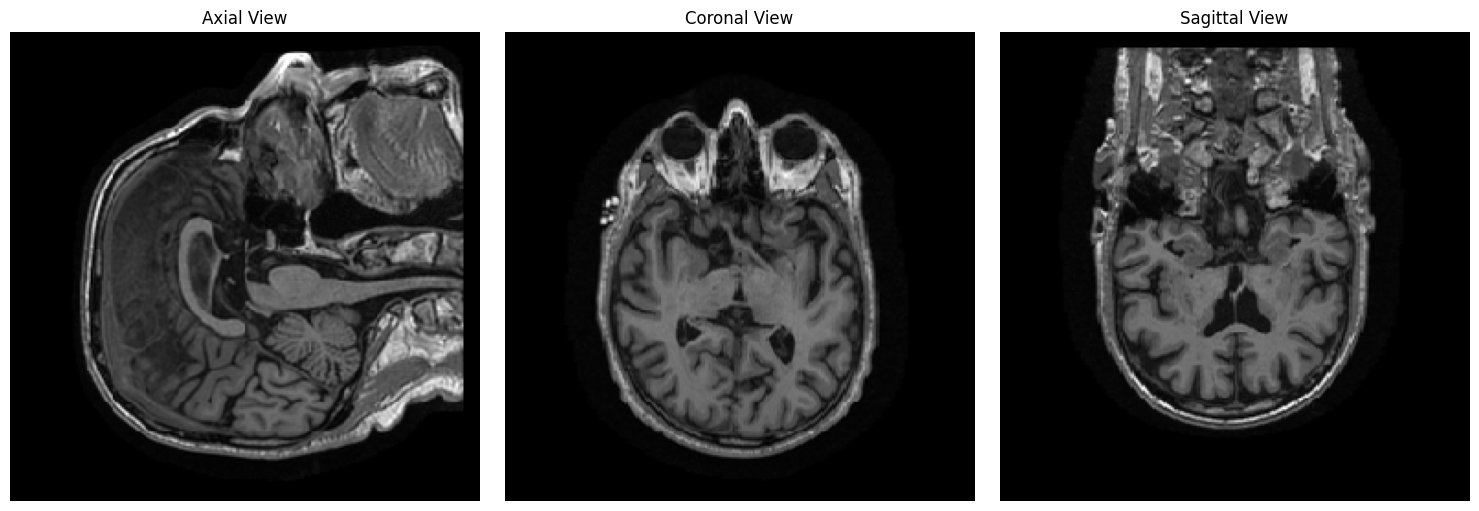

In [81]:
#using nibabel library to load NIfTI files
import nibabel as nb
import matplotlib.pyplot as plt
nii_path = 'out/brain_orig.nii.gz'
nii = nb.load(nii_path)

#internal data of NIfTI file
nii_data = nii.get_fdata()
axial_view = nii_data[nii_data.shape[0] // 2, :, :]      # Sagittal axis cut -> Axial plane
coronal_view = nii_data[:, nii_data.shape[1] // 2, :]    # Coronal axis cut -> Coronal plane
sagittal_view = nii_data[:, :, nii_data.shape[2] // 2]   # Axial axis cut -> Sagittal plane

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(axial_view.T, cmap="gray", origin="lower")
axes[0].set_title('Axial View')

axes[1].imshow(coronal_view.T, cmap="gray", origin="lower")
axes[1].set_title('Coronal View')

axes[2].imshow(sagittal_view.T, cmap="gray", origin="lower")
axes[2].set_title('Sagittal View')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()


After using NPP model

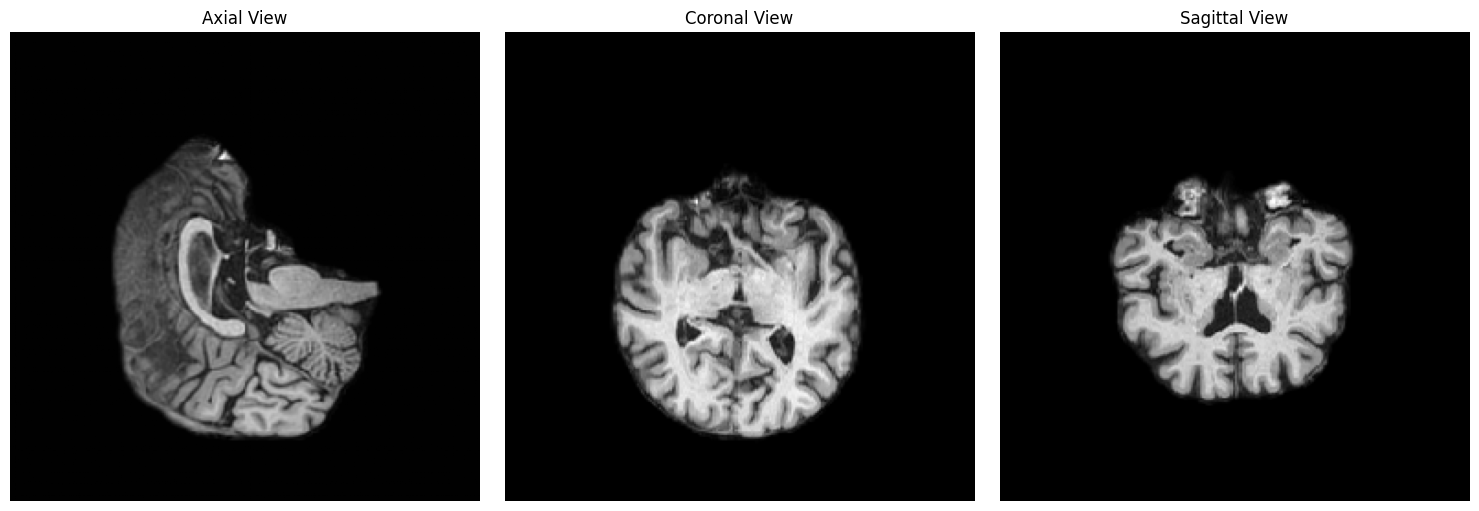

In [82]:
#using nibabel library to load NIfTI files
import nibabel as nb
import numpy as np
import matplotlib.pyplot as plt
nii_path = 'out/brain_norm.nii.gz'
nii = nb.load(nii_path)

#internal data of NIfTI file
nii_data = nii.get_fdata()
axial_view = nii_data[nii_data.shape[0] // 2, :, :]      # Sagittal axis cut -> Axial plane
coronal_view = nii_data[:, nii_data.shape[1] // 2, :]    # Coronal axis cut -> Coronal plane
sagittal_view = nii_data[:, :, nii_data.shape[2] // 2]   # Axial axis cut -> Sagittal plane

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(axial_view.T, cmap="gray", origin="lower")
axes[0].set_title('Axial View')

axes[1].imshow(coronal_view.T, cmap="gray", origin="lower")
axes[1].set_title('Coronal View')

axes[2].imshow(sagittal_view.T, cmap="gray", origin="lower")
axes[2].set_title('Sagittal View')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()


After Spatial normalization (MNI)

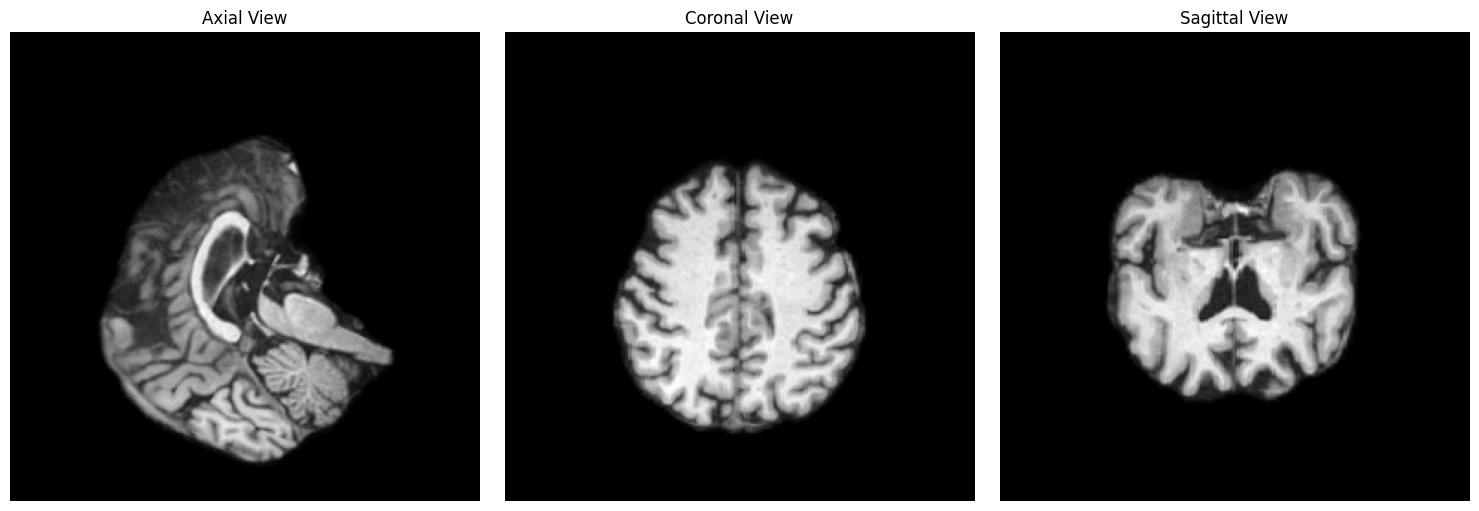

In [83]:
#using nibabel library to load NIfTI files
import nibabel as nb
import numpy as np

nii_path = 'out/brain_mni_norm.nii.gz'
nii = nb.load(nii_path)

#internal data of NIfTI file
nii_data = nii.get_fdata()
axial_view = nii_data[nii_data.shape[0] // 2, :, :]      # Sagittal axis cut -> Axial plane
coronal_view = nii_data[:, nii_data.shape[1] // 2 - 40, :]    # Coronal axis cut -> Coronal plane
sagittal_view = nii_data[:, :, nii_data.shape[2] // 2]   # Axial axis cut -> Sagittal plane

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(axial_view.T, cmap="gray", origin="lower")
axes[0].set_title('Axial View')

axes[1].imshow(coronal_view.T, cmap="gray", origin="lower")
axes[1].set_title('Coronal View')

axes[2].imshow(sagittal_view.T, cmap="gray", origin="lower")
axes[2].set_title('Sagittal View')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()
